In [1]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


### Overview of Dataset

In [3]:
# Loading the Spotify 2023 dataset into a DataFrame
data = pd.read_csv('spotify-2023.csv', encoding='latin-1')
data


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [4]:
# Displaying the dimensions of the Spotify dataset
size = data.shape
print(f"The Spotify Dataset contains {size[0]} rows & {size[1]} columns")

The Spotify Dataset contains 953 rows & 24 columns


In [5]:
print("\033[1m Data types of each column: \033[0m")
data.info()

 Data types of each column: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key        

In [6]:
# Checking for missing values in the dataset and summarizing the results
missing = data.isnull().sum()
print("\033[1m Missing values in each column: \033[0m")
print(missing)
total_missing = missing.sum()
print(f"The total missing values in each column: {total_missing}")

 Missing values in each column: 
track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64
The total missing values in each column: 145


### Basic Descriptive Statistics

In [8]:
# Calculating and displaying the mean, median, and standard deviation of the 'streams' column
mean = pd.to_numeric(data['streams'], errors='coerce').mean()
median = pd.to_numeric(data['streams'], errors='coerce').median()
std = pd.to_numeric(data['streams'], errors='coerce').std()

print(f"Mean of streams: {mean}")
print(f"Median of streams: {median}")
print(f"Standard Deviation of streams: {std}")

Mean of streams: 514137424.93907565
Median of streams: 290530915.0
Standard Deviation of streams: 566856949.0388832


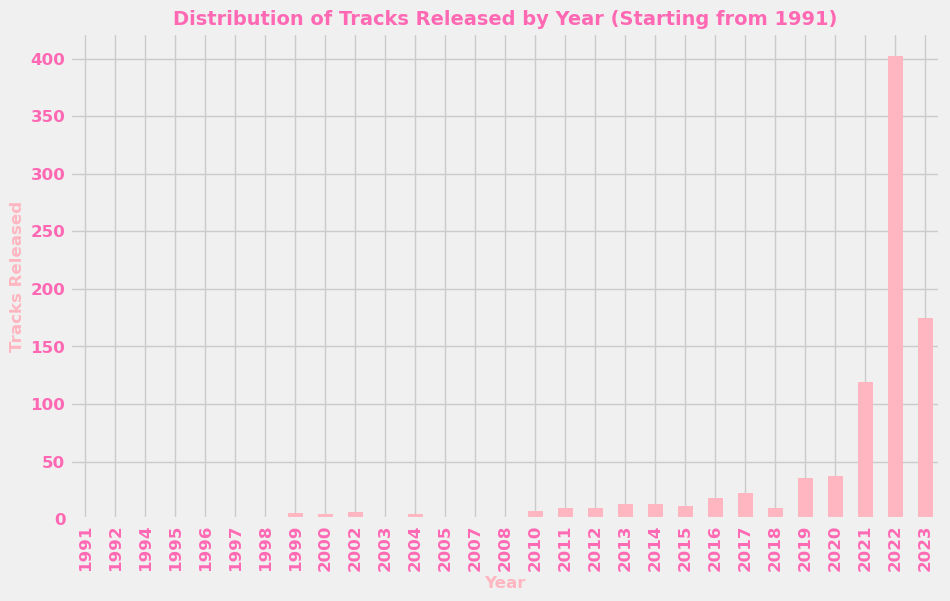

In [9]:
# Plotting the distribution of tracks released by year (starting from 1991)
plt.style.use('fivethirtyeight')
data_filtered = data[data['released_year'] >= 1990]
data_filtered['released_year'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6), color='lightpink')
plt.title('Distribution of Tracks Released by Year (Starting from 1991)', fontsize=14, fontweight='bold', color='hotpink')
plt.xlabel('Year', fontweight='bold', color='lightpink', fontsize=12)
plt.ylabel('Tracks Released', fontweight='bold', color='lightpink', fontsize=12)
plt.xticks(rotation=90, fontsize=12, fontweight='bold', color = 'hotpink', )
plt.yticks(fontsize=12, fontweight='bold', color = 'hotpink')
plt.show()

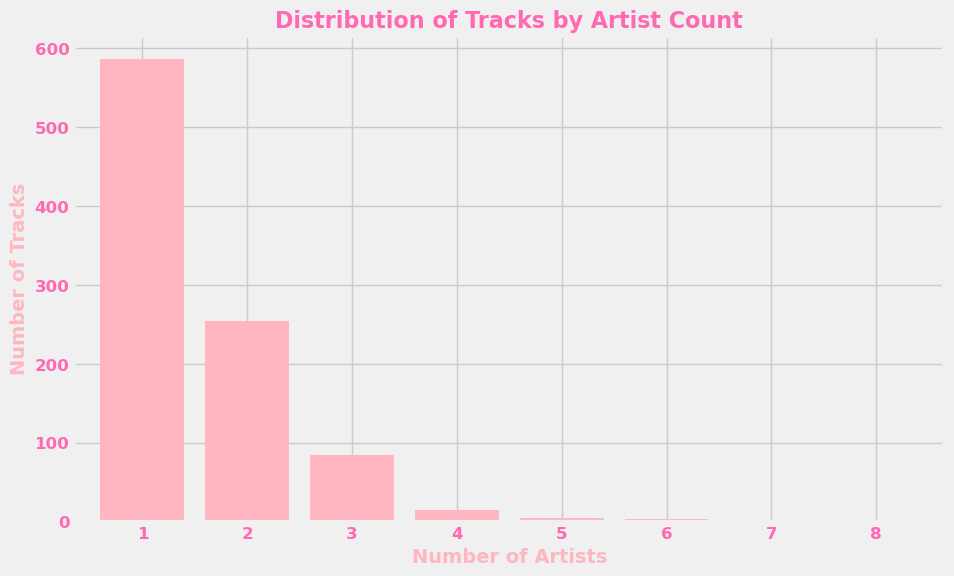

In [10]:
# Plotting the distribution of tracks by artist count
plt.style.use('seaborn-v0_8-pastel')
data['artist_count'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6), color='lightpink', width=0.8)
plt.title('Distribution of Tracks by Artist Count', fontsize=16, fontweight='bold', color='hotpink')
plt.xlabel('Number of Artists', fontsize=14, fontweight='bold', color='lightpink')
plt.ylabel('Number of Tracks', fontsize=14, fontweight='bold', color='lightpink')
plt.xticks(rotation=0, fontsize=12, fontweight='bold', color='hotpink')
plt.yticks(fontsize=12, fontweight='bold', color='hotpink')
plt.show()

### Top Performers

In [138]:
# Cleaning the 'streams' column and displaying the top 5 tracks with the highest number of streams
data['streams'] = pd.to_numeric(data['streams'].astype(str).str.replace(',', ''), errors='coerce')
streams_data = data.nlargest(5, 'streams').reset_index(drop=True)
streams_data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,171,C#,Major,50,38,80,0,0,9,7
1,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,96,C#,Minor,83,93,65,58,0,9,8
2,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,110,C#,Major,50,45,41,75,0,11,3
3,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,...,98,F#,Minor,82,54,59,69,0,18,10
4,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,...,90,D,Major,76,91,50,54,0,7,5


In [140]:
# Analyzing the top 5 most frequent artists based on the number of tracks they appear in
artists = data['artist(s)_name'].str.split(', ').explode().value_counts().head(5)
artists_data = artists.reset_index()
artists_data.columns = ['Artist', 'Track Count']
artists_data.set_index('Artist')
artists_data

,Artist,Track Count
0,Bad Bunny,40
1,Taylor Swift,38
2,The Weeknd,37
3,SZA,23
4,Kendrick Lamar,23


### Temporal Trends

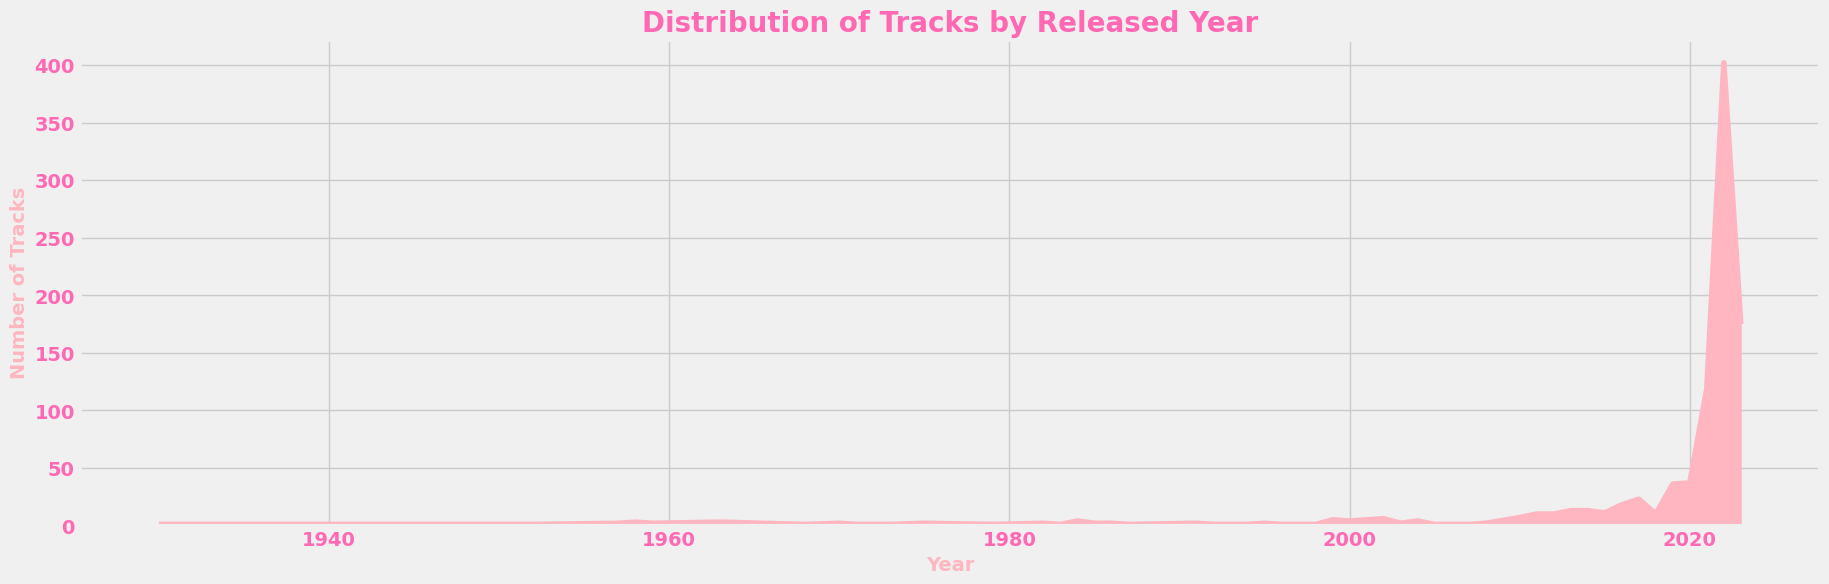

In [15]:
# Plotting the distribution of tracks by release year using an area chart
tracks_per_year = data['released_year'].value_counts().sort_index()
plt.figure(figsize=(20, 6))
tracks_per_year.plot(kind='area', color='lightpink')
plt.title('Distribution of Tracks by Released Year', fontsize=20, fontweight='bold', color='hotpink')
plt.xlabel('Year', fontsize=14, fontweight='bold', color='lightpink')
plt.ylabel('Number of Tracks', fontsize=14, fontweight='bold', color='lightpink')
plt.xticks(fontsize=14, fontweight='bold', color='hotpink')
plt.yticks(fontsize=14, fontweight='bold', color='hotpink')
plt.show()

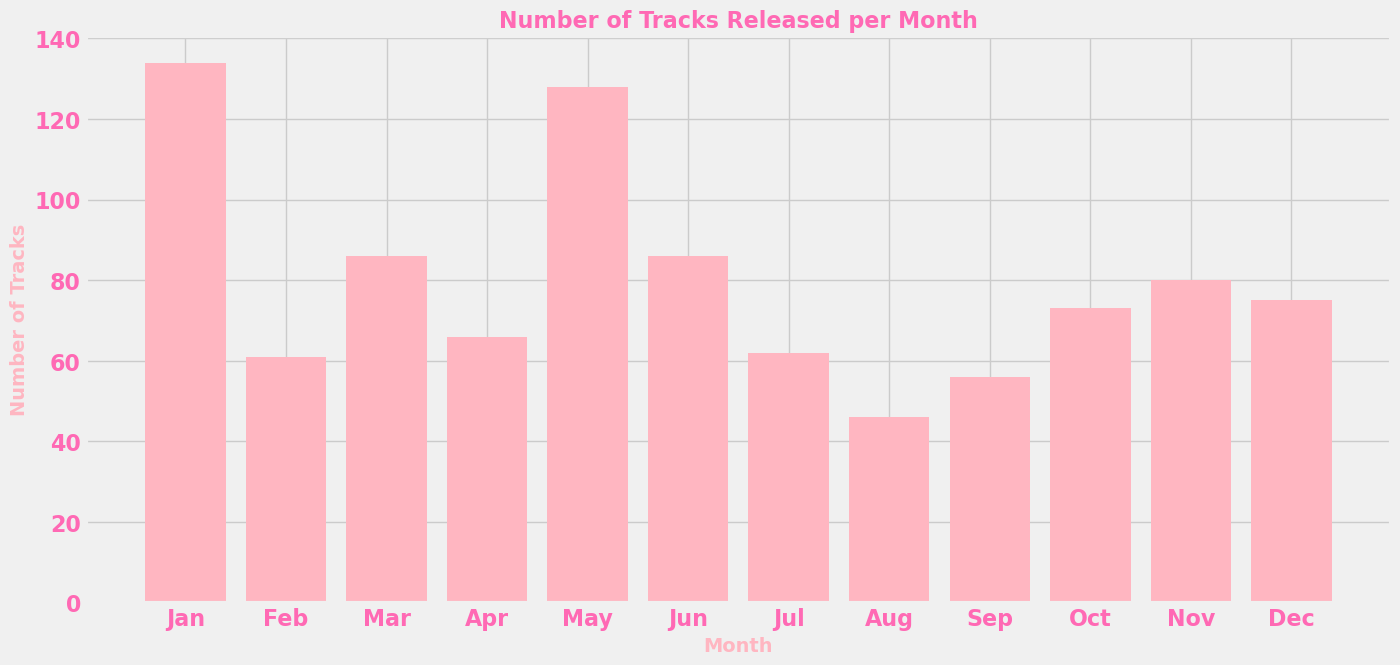

In [16]:
# Plotting the number of tracks released per month
month = data['released_month'].value_counts().sort_index()
plt.figure(figsize=(15, 7))
plt.bar(month.index, month.values, color='lightpink')
plt.title('Number of Tracks Released per Month', fontsize=16, fontweight='bold', color='hotpink')
plt.xlabel('Month', fontsize=14, fontweight='bold', color='lightpink')
plt.ylabel('Number of Tracks', fontsize=14, fontweight='bold', color='lightpink')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],fontsize=16, fontweight='bold', color='hotpink')
plt.yticks(fontsize=16, fontweight='bold',color='hotpink')
plt.show()

### Genre Music and Characteristics

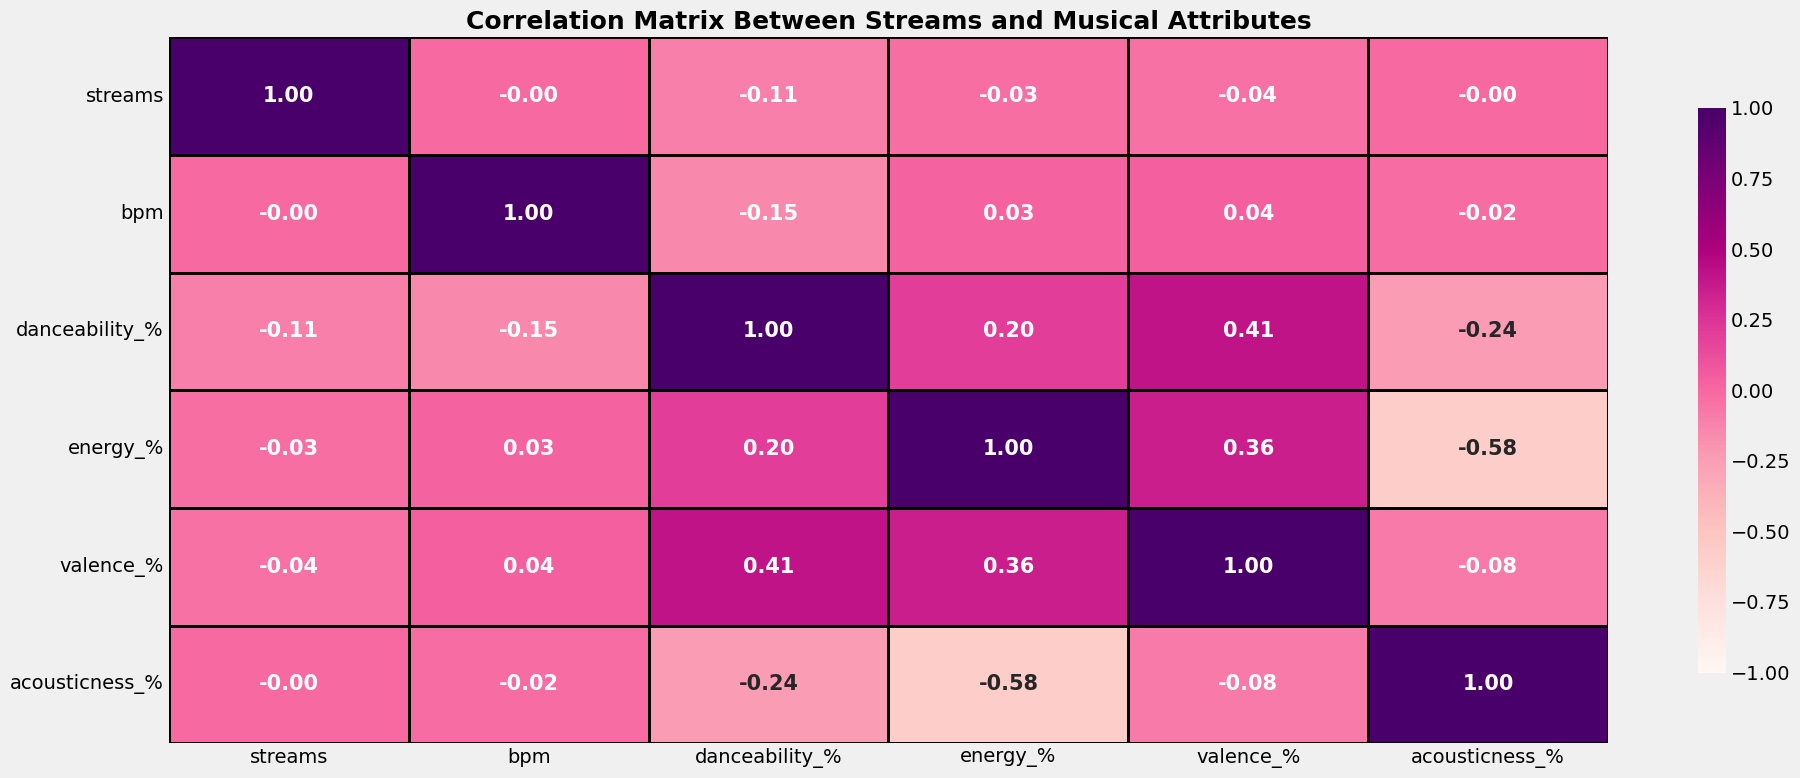

In [18]:
# Plotting the correlation matrix between streams and musical attributes
clean = data[['streams', 'bpm', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%']].dropna()
correlation_matrix = clean.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdPu", fmt='.2f', linewidths=1, linecolor='black', cbar_kws={'shrink': 0.8}, annot_kws={'size': 15, 'weight': 'bold'}, vmin=-1, vmax=1)
plt.title('Correlation Matrix Between Streams and Musical Attributes', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()


## Platform Popularity

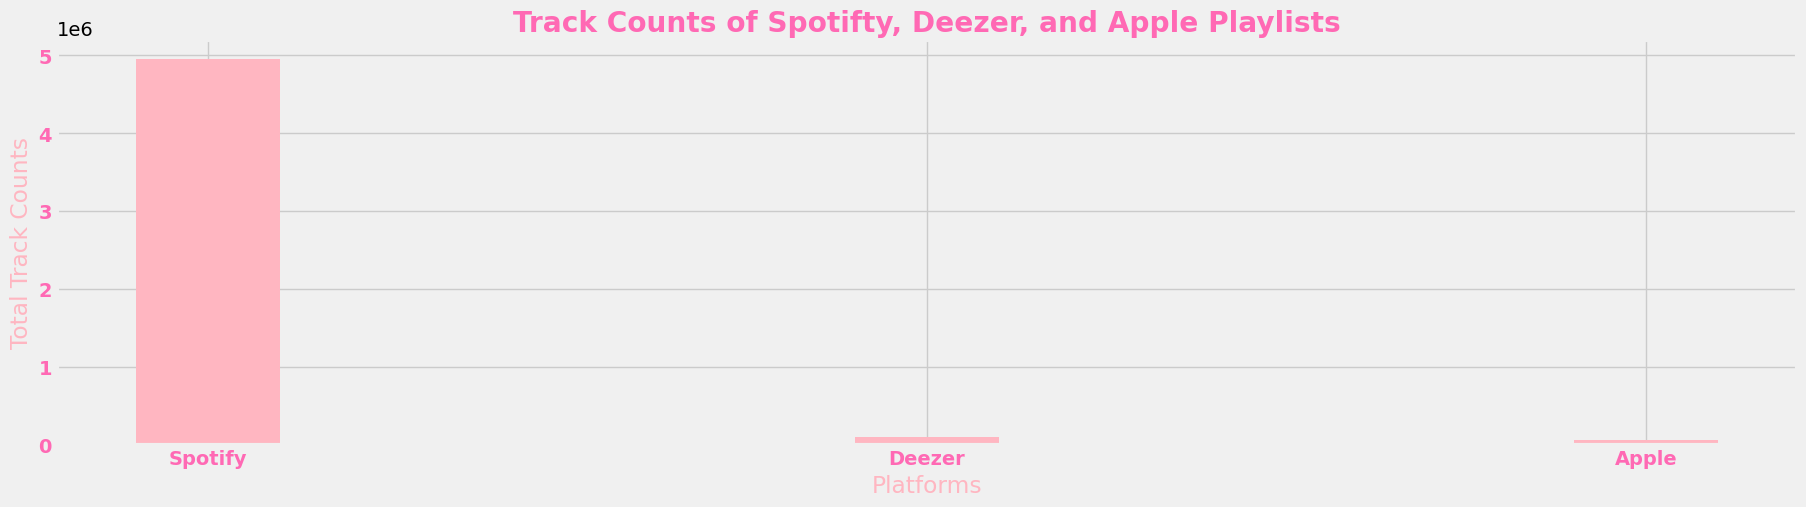

In [20]:
# Plotting the total track counts for Spotify, Deezer, and Apple Playlists
data['in_spotify_playlists'] = pd.to_numeric(data['in_spotify_playlists'], errors='coerce').fillna(0)
data['in_deezer_playlists'] = pd.to_numeric(data['in_deezer_playlists'], errors='coerce').fillna(0)
data['in_apple_playlists'] = pd.to_numeric(data['in_apple_playlists'], errors='coerce').fillna(0)

spotify_count = data['in_spotify_playlists'].sum()
deezer_count = data['in_deezer_playlists'].sum()
apple_count = data['in_apple_playlists'].sum()

platforms = ['Spotify', 'Deezer', 'Apple']
track_counts = [spotify_count, deezer_count, apple_count]

plt.figure(figsize=(20, 5))
plt.bar(platforms, track_counts, color='lightpink', width=0.2)
plt.title("Track Counts of Spotifty, Deezer, and Apple Playlists", color='hotpink', fontweight='bold')
plt.xlabel("Platforms", color='lightpink')
plt.ylabel("Total Track Counts", color='lightpink')
plt.xticks(fontsize=14, fontweight='bold', color='hotpink')
plt.yticks(fontsize=14, fontweight='bold', color='hotpink')
plt.show()

C:\Users\luisc\AppData\Local\Temp\ipykernel_7044\289119419.py:9: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(x='key', y='streams', hue='mode', data=avg_streams, palette=pink_palette)


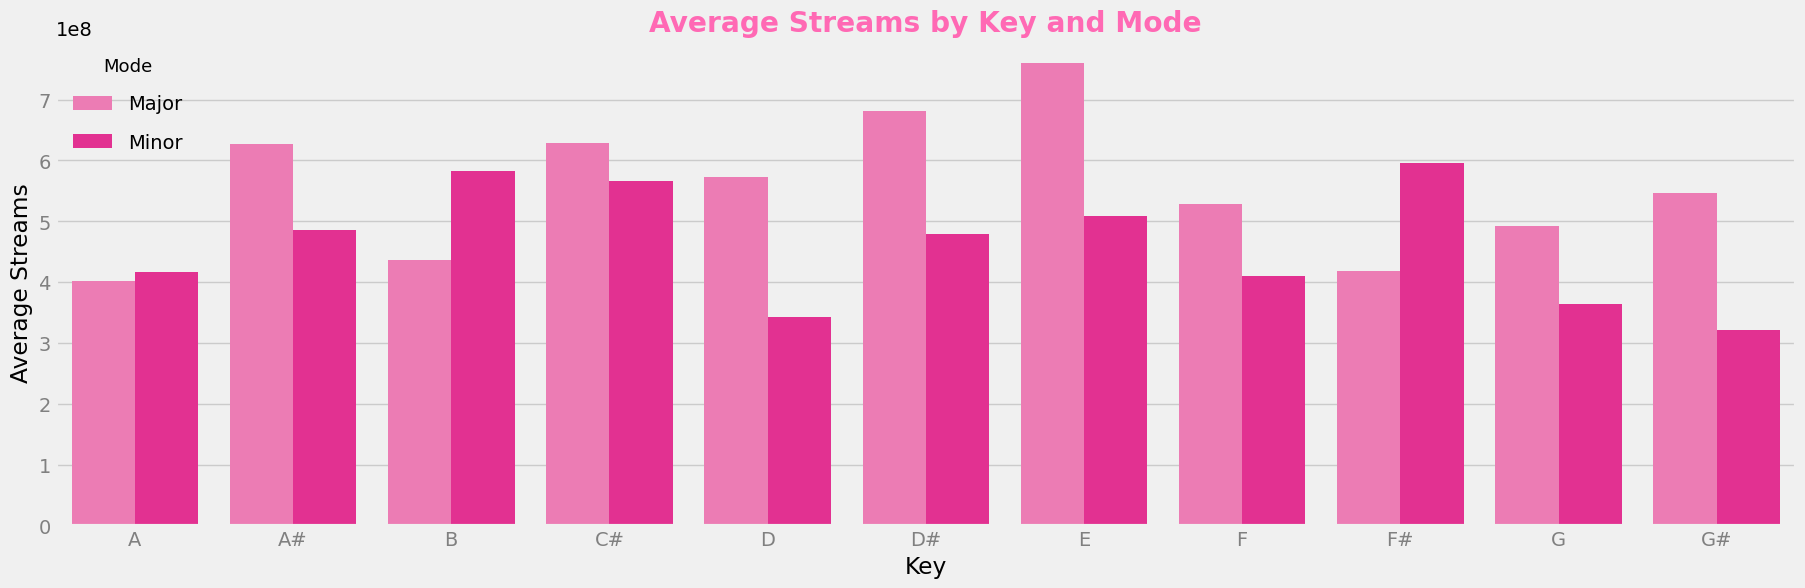

In [76]:
# Plotting the average streams by key and mode with a custom pink color palette
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')

avg_streams = data.groupby(['key', 'mode'])['streams'].mean().reset_index()

# Custom pink palette
pink_palette = ['#FF69B4', '#FF1493', '#FF66CC', '#FFB6C1']

plt.figure(figsize=(20, 6))
sns.barplot(x='key', y='streams', hue='mode', data=avg_streams, palette=pink_palette)

plt.title('Average Streams by Key and Mode',fontweight='bold', color='Hotpink')
plt.xlabel('Key', color='black')
plt.ylabel('Average Streams', color='black')

plt.xticks(color='gray')
plt.yticks(color='gray')
plt.legend(title='Mode', title_fontsize='13', loc='upper left', frameon=False, labelspacing=1)

plt.show()

C:\Users\luisc\AppData\Local\Temp\ipykernel_7044\1501557555.py:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(data=key_mode_counts, x='key', y='Count', hue='mode', palette=pink_palette, dodge=False)


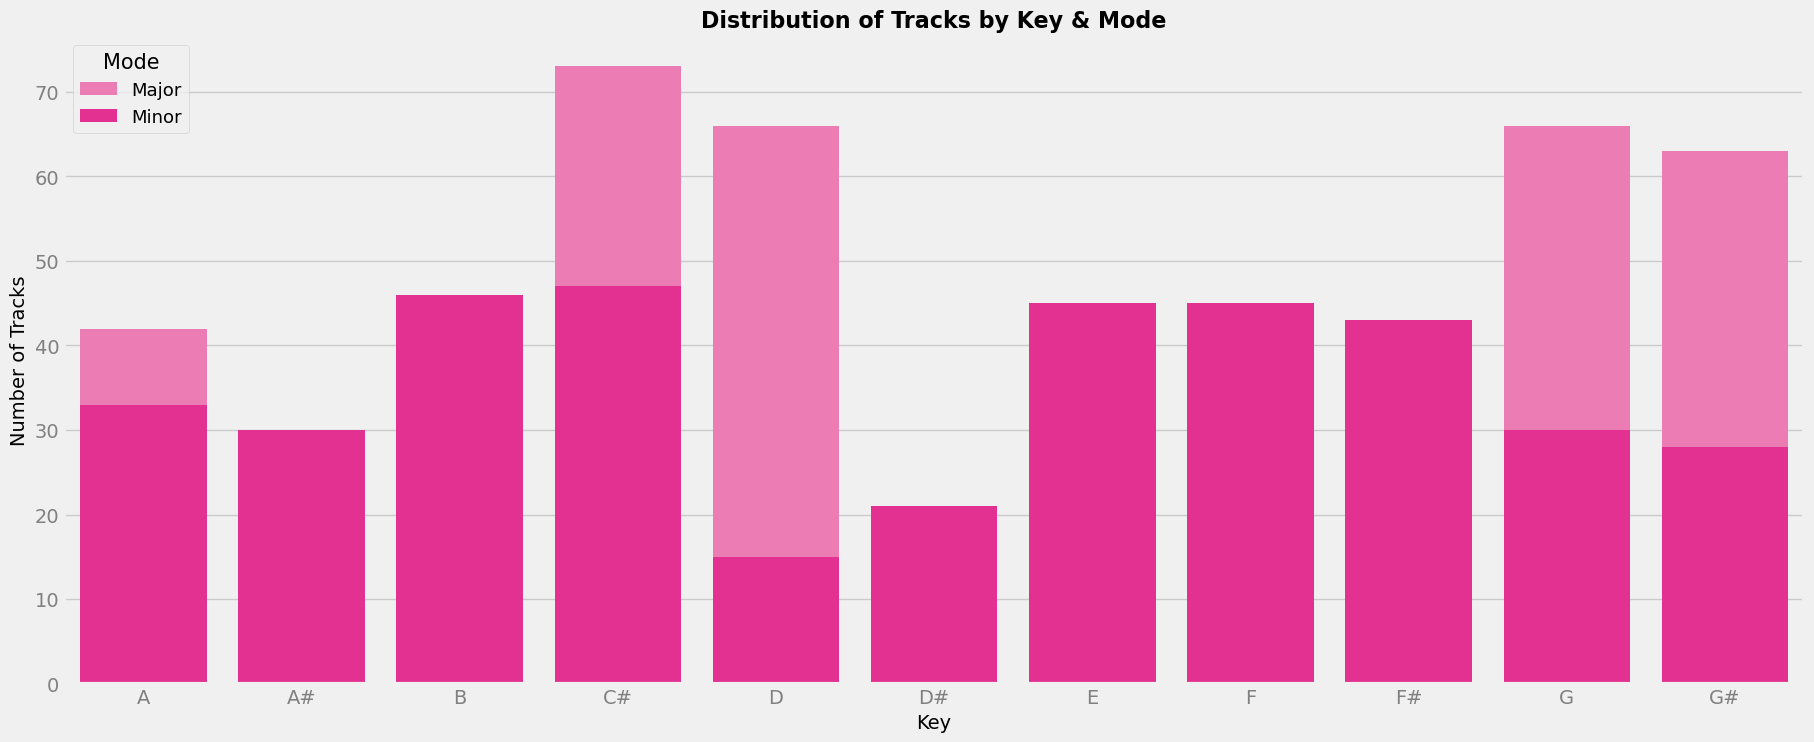

In [118]:
# Plotting the distribution of tracks by key and mode (Major vs Minor)
key_mode_counts = data.groupby(['key', 'mode']).size().reset_index(name='Count')
plt.figure(figsize=(20, 8))
pink_palette = ['#FF69B4', '#FF1493', '#FF66CC', '#FFB6C1']
sns.barplot(data=key_mode_counts, x='key', y='Count', hue='mode', palette=pink_palette, dodge=False)
plt.title('Distribution of Tracks by Key & Mode', fontsize=16, fontweight='bold')
plt.xlabel('Key', fontsize=14)
plt.ylabel('Number of Tracks', fontsize=14)
plt.xticks(color='gray')
plt.yticks(color='gray')
plt.legend(title='Mode', title_fontsize='15', fontsize='13', loc='upper left')
plt.show()

C:\Users\luisc\AppData\Local\Temp\ipykernel_7044\2373460703.py:13: UserWarning: 
The palette list has fewer values (4) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=top_artists, x='Artist', y='Appearances', hue='Artist', dodge=False, palette=pink_palette, legend=False)


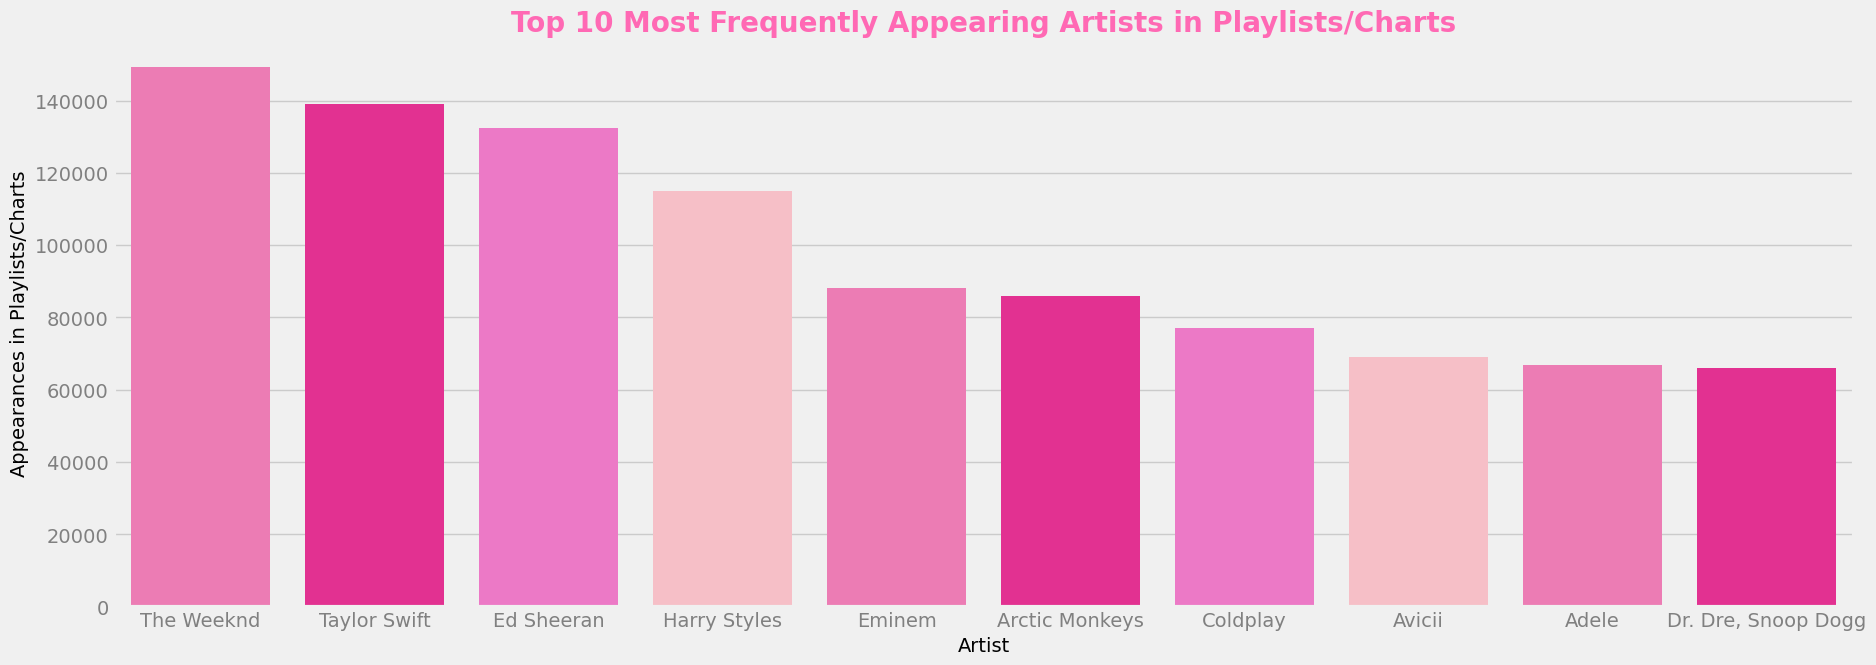

In [136]:
platform_columns = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts']

data[platform_columns] = data[platform_columns].apply(pd.to_numeric, errors='coerce')
artist_counts = data.groupby("artist(s)_name")[platform_columns].sum().sum(axis=1).sort_values(ascending=False)
top_artists = artist_counts.head(10).reset_index()
top_artists.columns = ['Artist', 'Appearances']

plt.figure(figsize=(20, 7))
sns.barplot(data=top_artists, x='Artist', y='Appearances', hue='Artist', dodge=False, palette=pink_palette, legend=False)
plt.title('Top 10 Most Frequently Appearing Artists in Playlists/Charts', fontsize=20, fontweight='bold', color='hotpink')
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Appearances in Playlists/Charts', fontsize=14)
plt.xticks(color='gray')
plt.yticks(color='gray')
plt.show()